In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from read_roi import read_roi_zip
from collections import OrderedDict, Counter
import math
import PIL
from PIL import Image
from PIL.TiffTags import TAGS
import tkinter as tk
from tkinter import filedialog
import seaborn as sns

# Read, format and save raw data from ROIs #

In [250]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)
path

WindowsPath('C:/Users/Brouhard Lab/Data/Images/2022-12-19_dynamics/2022-12-19_dynamics_Ch1-tub06uM-DCX00nM-EB00nM_noKCl')

In [251]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'

EBconc = '[EB] ' r'$(n M)$'
EB = 'EB'

investigator = 'Brandi'

In [252]:
dateloc = str(path).find("202")
date = str(path)[dateloc : dateloc+10]

folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if (str(i)[-7:] == 'finalDS') == True]

ch = []
conc_tub = []
conc_DCX = []
conc_EB = []
#DCX_type = []

for i in folders:
    CHloc = str(i).rfind("Ch")
    tubloc = str(i).rfind(tub)
    DCXloc = str(i).rfind(DCX)
    #dcxtype = str(i).find("type")
    EBloc = str(i).rfind(EB)
    ch = ch + [str(i)[CHloc+2:CHloc+3]]
    conc_tub = conc_tub + [(str(i)[tubloc+3:tubloc+5])]
    conc_DCX = conc_DCX + [(str(i)[DCXloc+3:DCXloc+5])]
    conc_EB = conc_EB + [(str(i)[EBloc+2:EBloc+4])]

date,ch, conc_tub, conc_DCX, conc_EB


('2022-12-19', ['1'], ['06'], ['00'], ['00'])

In [253]:
tub_conc =  [float(i) for i in conc_tub]
DCX_conc =  [float(i) for i in conc_DCX]
EB_conc = [float(i) for i in conc_EB]
frame_analyzer = pd.read_csv(path/'frame_rates_avg.csv',sep=',')
pixel =  0.107 #T2 0.107 #T1 0.0633
folders

[WindowsPath('C:/Users/Brouhard Lab/Data/Images/2022-12-19_dynamics/2022-12-19_dynamics_Ch1-tub06uM-DCX00nM-EB00nM_noKCl/2022-12-19_dynamics_Ch1-tub06uM-DCX00nM-EB00nM_noKCl_finalDS')]

In [254]:
#frame_analyzer = frame_analyzer.iloc[[1,3]].reset_index()
frame_analyzer

,Directory,Mean,SD,Frames,Outliers,MeanWOutliers,SDWOutliers
0,C:\Users\Brouhard Lab\Data\Images\2022-12-19_d...,5.02,0.02,400,1,11.18,123.01


In [255]:
def open_roi_poly(k,name):
    roi_path = folders[k]/(name)

    roi_data = read_roi_zip(roi_path)
    roi_df = pd.DataFrame(columns=['Track ID','x1','x2','x3','y1','y2','y3'])
    
    for key in roi_data:
        roi_df1 = pd.DataFrame({'Track ID': [roi_data[key]['name']],'x1': [roi_data[key]['x'][0]],'x2': [roi_data[key]['x'][1]],'x3': [roi_data[key]['x'][2]],'y1': [roi_data[key]['y'][0]],'y2': [roi_data[key]['y'][1]],'y3': [roi_data[key]['y'][2]]})
        roi_df = pd.concat([roi_df,roi_df1])
    
    roi_df = roi_df.reset_index(drop = True)
    return roi_df

def open_roi_line(k,name):
    roi_path = folders[k]/(name)
    roi_data = read_roi_zip(roi_path)
    roi_df = pd.DataFrame(columns=['Track ID','x1','x2','y1','y2'])
    
    for key in roi_data:
        roi_df1 = pd.DataFrame({'Track ID': [roi_data[key]['name']],'x1': [roi_data[key]['x1']],'x2': [roi_data[key]['x2']],'y1': [roi_data[key]['y1']],'y2': [roi_data[key]['y2']]})
        roi_df = pd.concat([roi_df,roi_df1])
        
    roi_df = roi_df.reset_index(drop = True)
    return roi_df


In [256]:
open_roi_poly(0,'kymoslopes.zip')

,Track ID,x1,x2,x3,y1,y2,y3
0,0106-0019,17.0,23.5,13.5,68.5,139.0,142.0
1,0267-0011,14,6,16,228,303,306
2,0103-0054,50,58,50,85,118,120
3,0061-0012,17,7,17,44,76,78
4,0143-0040,37,44,36,129,156,157
5,0086-0027,22,36,18,58,111,113
6,0193-0025,18,32,17,163,216,222
7,0043-0018,16,20,16,29,56,57
8,0228-0032,25,39,26,202,252,253
9,0100-0030,25,34,26,86,112,113


In [257]:
roi_path = folders[0]/('start.zip')
roi_data = read_roi_zip(roi_path)
roi_data

OrderedDict([('0003-0022',
              {'type': 'polyline',
               'x': [15.5, 20.5, 28.333332061767578],
               'y': [7.666666507720947,
                4.666666507720947,
                -0.5000004768371582],
               'n': 3,
               'width': 0,
               'name': '0003-0022',
               'position': 0}),
             ('0004-0038',
              {'type': 'polyline',
               'x': [33.5, 38.33333206176758, 41.5],
               'y': [7.5, 3.1666665077209473, 0.0],
               'n': 3,
               'width': 0,
               'name': '0004-0038',
               'position': 0})])

In [258]:
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'
poly_parameter_names = (Length,Lifetime,GrowthRate,TimeToNucleate)
line_parameter_names = (Length,Lifetime,GrowthRate,TimeToNucleate,ShrinkageLength,ShrinkageLifetime,ShrinkageRate)

In [259]:
def poly_dynamics(k):
        
    data = open_roi_poly(k,'kymoslopes.zip')
    supp = open_roi_poly(k,'start.zip')
    
    spf = frame_analyzer['Mean'][k];
    frames = frame_analyzer['Frames'][k]
    
    suppn = len(supp)
    start = sum(abs(supp['y2']-supp['y1']))/suppn;
    
    n = len(data)
    pre_df ={'Date': np.full((n), date), 'Investigator': np.full((n), investigator),
              'Ch': np.full((n), ch[k]),tubulin: np.full((n), tub_conc[k]),DCXconc: np.full((n), DCX_conc[k]),EBconc: np.full((n), EB_conc[k])}
    df = pd.DataFrame(pre_df) 
    
    df[Length] = abs((data['x2']-data['x1'])*pixel)
    data[Lifetime] = abs((data['y2']-data['y1'])*spf/60)
    
    df[Lifetime] = data[[Lifetime,'y2']].apply(lambda x: x[Lifetime] if x['y2'] < frames else np.NaN, axis=1)
    df[Lifetime] = data[[Lifetime,'y2']].apply(lambda x: x[Lifetime] if x[Lifetime] != 0 else np.NaN, axis=1)
    
    df[GrowthRate] = df[Length]/df[Lifetime]
    df[GrowthRate] = df[GrowthRate].apply(lambda x: x if x <= 5 else np.NAN )
    
    df[TimeToNucleate] = (data['y1']-start)*spf/60
    
    df[ShrinkageLength] = abs((data['x3']-data['x2'])*pixel)
    df[ShrinkageLifetime] = abs((data['y3']-data['y2'])*spf/60)
    df[ShrinkageLifetime] = df[ShrinkageLifetime].apply(lambda x: np.NAN if x == 0 else x)
    df[ShrinkageRate] = df[ShrinkageLength]/df[ShrinkageLifetime]
    
    df.loc[pd.isnull(df[GrowthRate]), 
           [Length,Lifetime,TimeToNucleate,ShrinkageLength,ShrinkageLifetime,ShrinkageRate]] = np.NaN
    
    df['Rescues'] = df[[Length,ShrinkageLength]].apply(lambda x: True if abs(x[Length]-x[ShrinkageLength]) > pixel*5 else False, axis=1)
    
    
    return df

def line_dynamics(k):
        
    data = open_roi_line(k,'kymoslope_line.zip')
    supp = open_roi_line(k,'start_line.zip')
    
    
    spf = frame_analyzer['Mean'][k];
    frames = frame_analyzer['Frames'][k]-2
    
    suppn = len(supp)
    start = sum(abs(supp['y2']-supp['y1']))/suppn;
    
    n = len(data)
    pre_df = {'Date': np.full((n), date),'Ch': np.full((n), ch[k]),'Concentration ' r'$(\mu M)$': np.full((n), tub_conc[k])}
    df = pd.DataFrame(pre_df) 
    
    
    df[Length] = abs((data['x2']-data['x1'])*pixel)
    df[Lifetime] = abs((data['y2']-data['y1'])*spf/60)
    
    df[GrowthRate] = df[Length]/df[Lifetime]
    df[GrowthRate] = df[GrowthRate].apply(lambda x: x if x <= 5 else np.NaN )
    
    data[Lifetime] = abs((data['y2']-data['y1'])*spf/60)
    df[Lifetime] = data[[Lifetime,'y2']].apply(lambda x: x[Lifetime] if x['y2'] < frames else np.NaN, axis=1)
    
    df[Length] = df[GrowthRate]*df[Lifetime]
    
    df.loc[pd.isnull(df[GrowthRate]), [Length,
        Lifetime]] = np.NaN
    
    df = df[['Date','Ch','Concentration ' r'$(\mu M)$',Length,
             Lifetime,GrowthRate]]

    
    return df


In [260]:
path.parents[0],path

(WindowsPath('C:/Users/Brouhard Lab/Data/Images/2022-12-19_dynamics'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Images/2022-12-19_dynamics/2022-12-19_dynamics_Ch1-tub06uM-DCX00nM-EB00nM_noKCl'))

In [261]:
newdirectory = str(path.parents[0])+'//Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)

In [262]:
df = poly_dynamics(0)
for i in range(1,len(ch)):
    df0 = poly_dynamics(i)
    df = df.append(df0, ignore_index=True)

df.to_csv(path/(investigator+'_'+date +'.csv'), encoding='utf-8', index=False)
df.to_csv(newmydir/(investigator+'_'+date+'.csv'), encoding='utf-8', index=False)
df

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,2022-12-19,Brandi,1,6.0,0.0,0.0,0.6955,5.898500,0.117911,5.424389,1.07,0.251000,4.262948,False
1,2022-12-19,Brandi,1,6.0,0.0,0.0,0.856,6.275000,0.136414,18.769222,1.07,0.251000,4.262948,False
2,2022-12-19,Brandi,1,6.0,0.0,0.0,0.856,2.761000,0.310033,6.804889,0.856,0.167333,5.115538,False
3,2022-12-19,Brandi,1,6.0,0.0,0.0,1.07,2.677333,0.399651,3.374556,1.07,0.167333,6.394422,False
4,2022-12-19,Brandi,1,6.0,0.0,0.0,0.749,2.259000,0.331563,10.486222,0.856,0.083667,10.231076,False
5,2022-12-19,Brandi,1,6.0,0.0,0.0,1.498,4.434333,0.337819,4.545889,1.926,0.167333,11.50996,False
6,2022-12-19,Brandi,1,6.0,0.0,0.0,1.498,4.434333,0.337819,13.330889,1.605,0.502000,3.197211,False
7,2022-12-19,Brandi,1,6.0,0.0,0.0,0.428,2.259000,0.189464,2.119556,0.428,0.083667,5.115538,False
8,2022-12-19,Brandi,1,6.0,0.0,0.0,1.498,4.183333,0.358088,16.593889,1.391,0.083667,16.625498,False
9,2022-12-19,Brandi,1,6.0,0.0,0.0,0.963,2.175333,0.442691,6.888556,0.856,0.083667,10.231076,False


In [263]:
dfmean = df.groupby('Ch').mean()
dfmean.to_csv(path/(date+'_0_mean.csv'), encoding='utf-8', index=False)
dfmean

,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Shrink Lifetime $(min)$,Rescues
Ch,,,,,,,
1,6.0,0.0,0.0,3.527944,0.30783,0.174306,0.0


In [264]:
dfstd = df.groupby('Ch').std()
dfstd.to_csv(path/(date+'_0_std.csv'), encoding='utf-8', index=False)
dfstd

,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Shrink Lifetime $(min)$,Rescues
Ch,,,,,,,
1,0.0,0.0,0.0,1.4839,0.106605,0.120762,0.0


# Preliminary plot Histograms #

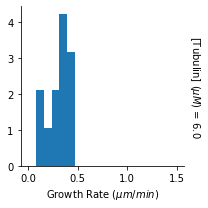

In [265]:
g = sns.FacetGrid(df, row=tubulin, margin_titles=True)
bins = np.linspace(0, 1.5, 20)
g.map(plt.hist, GrowthRate, bins=bins, density=True)
plt.savefig(path/('Growth_Rate'+'_'+date+'.jpg'),bbox_inches='tight')

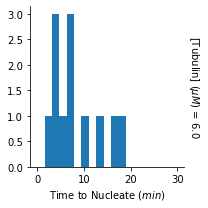

In [266]:
g = sns.FacetGrid(df, row=tubulin, margin_titles=True)
bins = np.linspace(0, 30, 20)
g.map(plt.hist, TimeToNucleate, bins=bins)
plt.savefig(path/('Time_to_Nucleate'+'_'+date+'.jpg'),bbox_inches='tight')

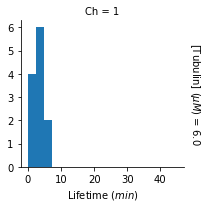

In [267]:
g = sns.FacetGrid(df, row=tubulin, col="Ch", margin_titles=True)
bins = np.linspace(0, 45, 20)
g.map(plt.hist, Lifetime, bins=bins)
plt.savefig(path/('Lifetime'+'_'+date+'.jpg'),bbox_inches='tight')

In [33]:
g = sns.FacetGrid(df, row=tubulin, col="DCX Type", margin_titles=True)
bins = np.linspace(0, 10, 20)
g.map(plt.hist, ShrinkageRate, bins=bins)

KeyError: 'DCX Type'